# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensuring graphs are displayed
%matplotlib inline

# Importing Data

In [3]:
# Creating Path
path = r'C:\Users\jenni\OneDrive\Documenten\Data Analyst Program\Data Analytics Immersion\Achievement 6\Gun violence data\02 Data'

In [4]:
# Loading data
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun_violence_clean.csv'))

# Task

## Extreme values Check

In [5]:
# Checking mean
df_gun['n_killed'].mean()

0.25228953967214207

In [6]:
# Checking Median
df_gun['n_killed'].median()

0.0

In [7]:
# Checking max value
df_gun['n_killed'].max()

50

In [8]:
# Checking mean
df_gun['n_injured'].mean()

0.4940065171042695

In [9]:
# Checking Median
df_gun['n_injured'].median()

0.0

In [10]:
# Checking max value
df_gun['n_injured'].max()

53

No extreme values were found

## Data Prep

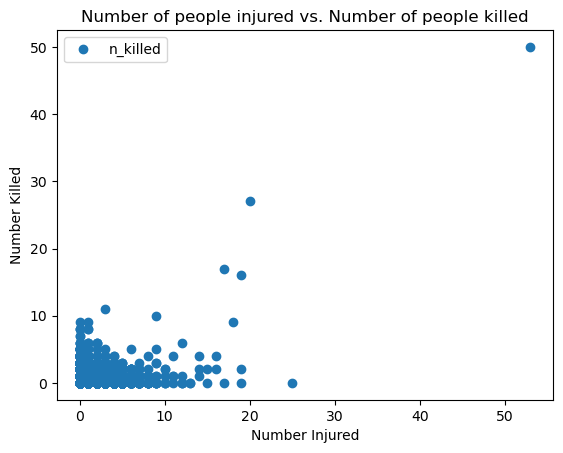

In [12]:
# Creating Scatterplot
df_gun.plot(x = 'n_injured', y = 'n_killed', style = 'o')
plt.title('Number of people injured vs. Number of people killed')
plt.xlabel('Number Injured')
plt.ylabel('Number Killed')
plt.show()

### Hypothesis 
as the number of people injured in a gun violence incident increases, so does the number of people killed

In [17]:
# Reshaping variables into NumPy arrays
X = df_gun['n_injured'].values.reshape(-1,1)
y = df_gun['n_killed'].values.reshape(-1,1)

In [19]:
X

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [15]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [20]:
# Splitting data into Training and Test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [21]:
# Creating Regression Object
regression = LinearRegression()

In [22]:
# Fitting Regression Object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predicting y values using X
y_predicted = regression.predict(X_test)

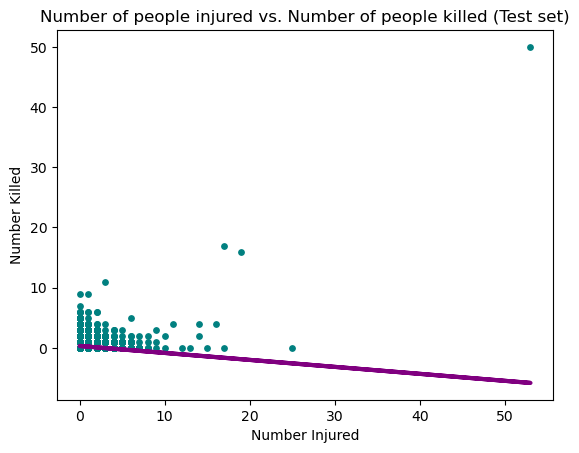

In [25]:
# Creating Regression line plot
plot_test = plt
plot_test.scatter(X_test, y_test, color='teal', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Number of people injured vs. Number of people killed (Test set)')
plot_test.xlabel('Number Injured')
plot_test.ylabel('Number Killed')
plot_test.show()

In [26]:
# Creating objects that contain model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [27]:
# Printing Model Summary Statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.11595093]]
Mean squared error:  0.30679107597850697
R2 score:  -0.010443770714853029


In [28]:
y_predicted

array([[0.19241259],
       [0.19241259],
       [0.19241259],
       ...,
       [0.30836351],
       [0.19241259],
       [0.19241259]])

In [29]:
# Creating Dataframe comparing acutal and predicted values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.192413
1,4,0.192413
2,0,0.192413
3,0,0.192413
4,0,0.308364
5,0,0.308364
6,0,0.192413
7,1,0.308364
8,0,0.308364
9,0,0.192413


### Comparing Regression Fit

In [40]:
# Predicting x
y_predicted_train = regression.predict(X_train)

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
# Printing Test Model Summary Statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.11595093]]
Mean squared error:  0.2518592752945912
R2 score:  0.02682981988518751


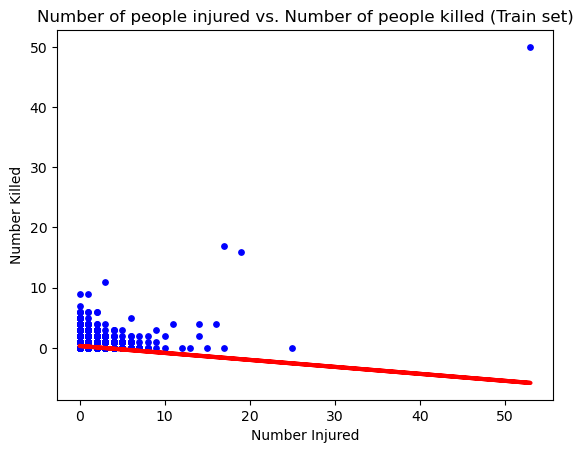

In [35]:
# Training Set Results
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of people injured vs. Number of people killed (Train set)')
plot_test.xlabel('Number Injured')
plot_test.ylabel('Number Killed')
plot_test.show()

The line does not fit the data all that well as most of the data points on the left side are not close to it, and there are no data points from the middle on (which is also logical as there cannot possibly be -1 deaths)

### Toughts on Model Performance
When comparing the two plots, there is barely any difference visible. However, when looking at the performance statistics, the training model was different from the test model. While the slope was the same (as was evident from the plots), the MSE was higher for the training model, and the R2 lower. The predicted values were also often far off from the acutal values.

In conclusion, the model did not perform all that well

When considering bias, this could happen when certain values (like the outlier values) would be taken out. While this may improve model performance, this could lead to bias as the outlier values of 50 might be correct numbers